# NCAA MARCH MADNESS - Machine Learning

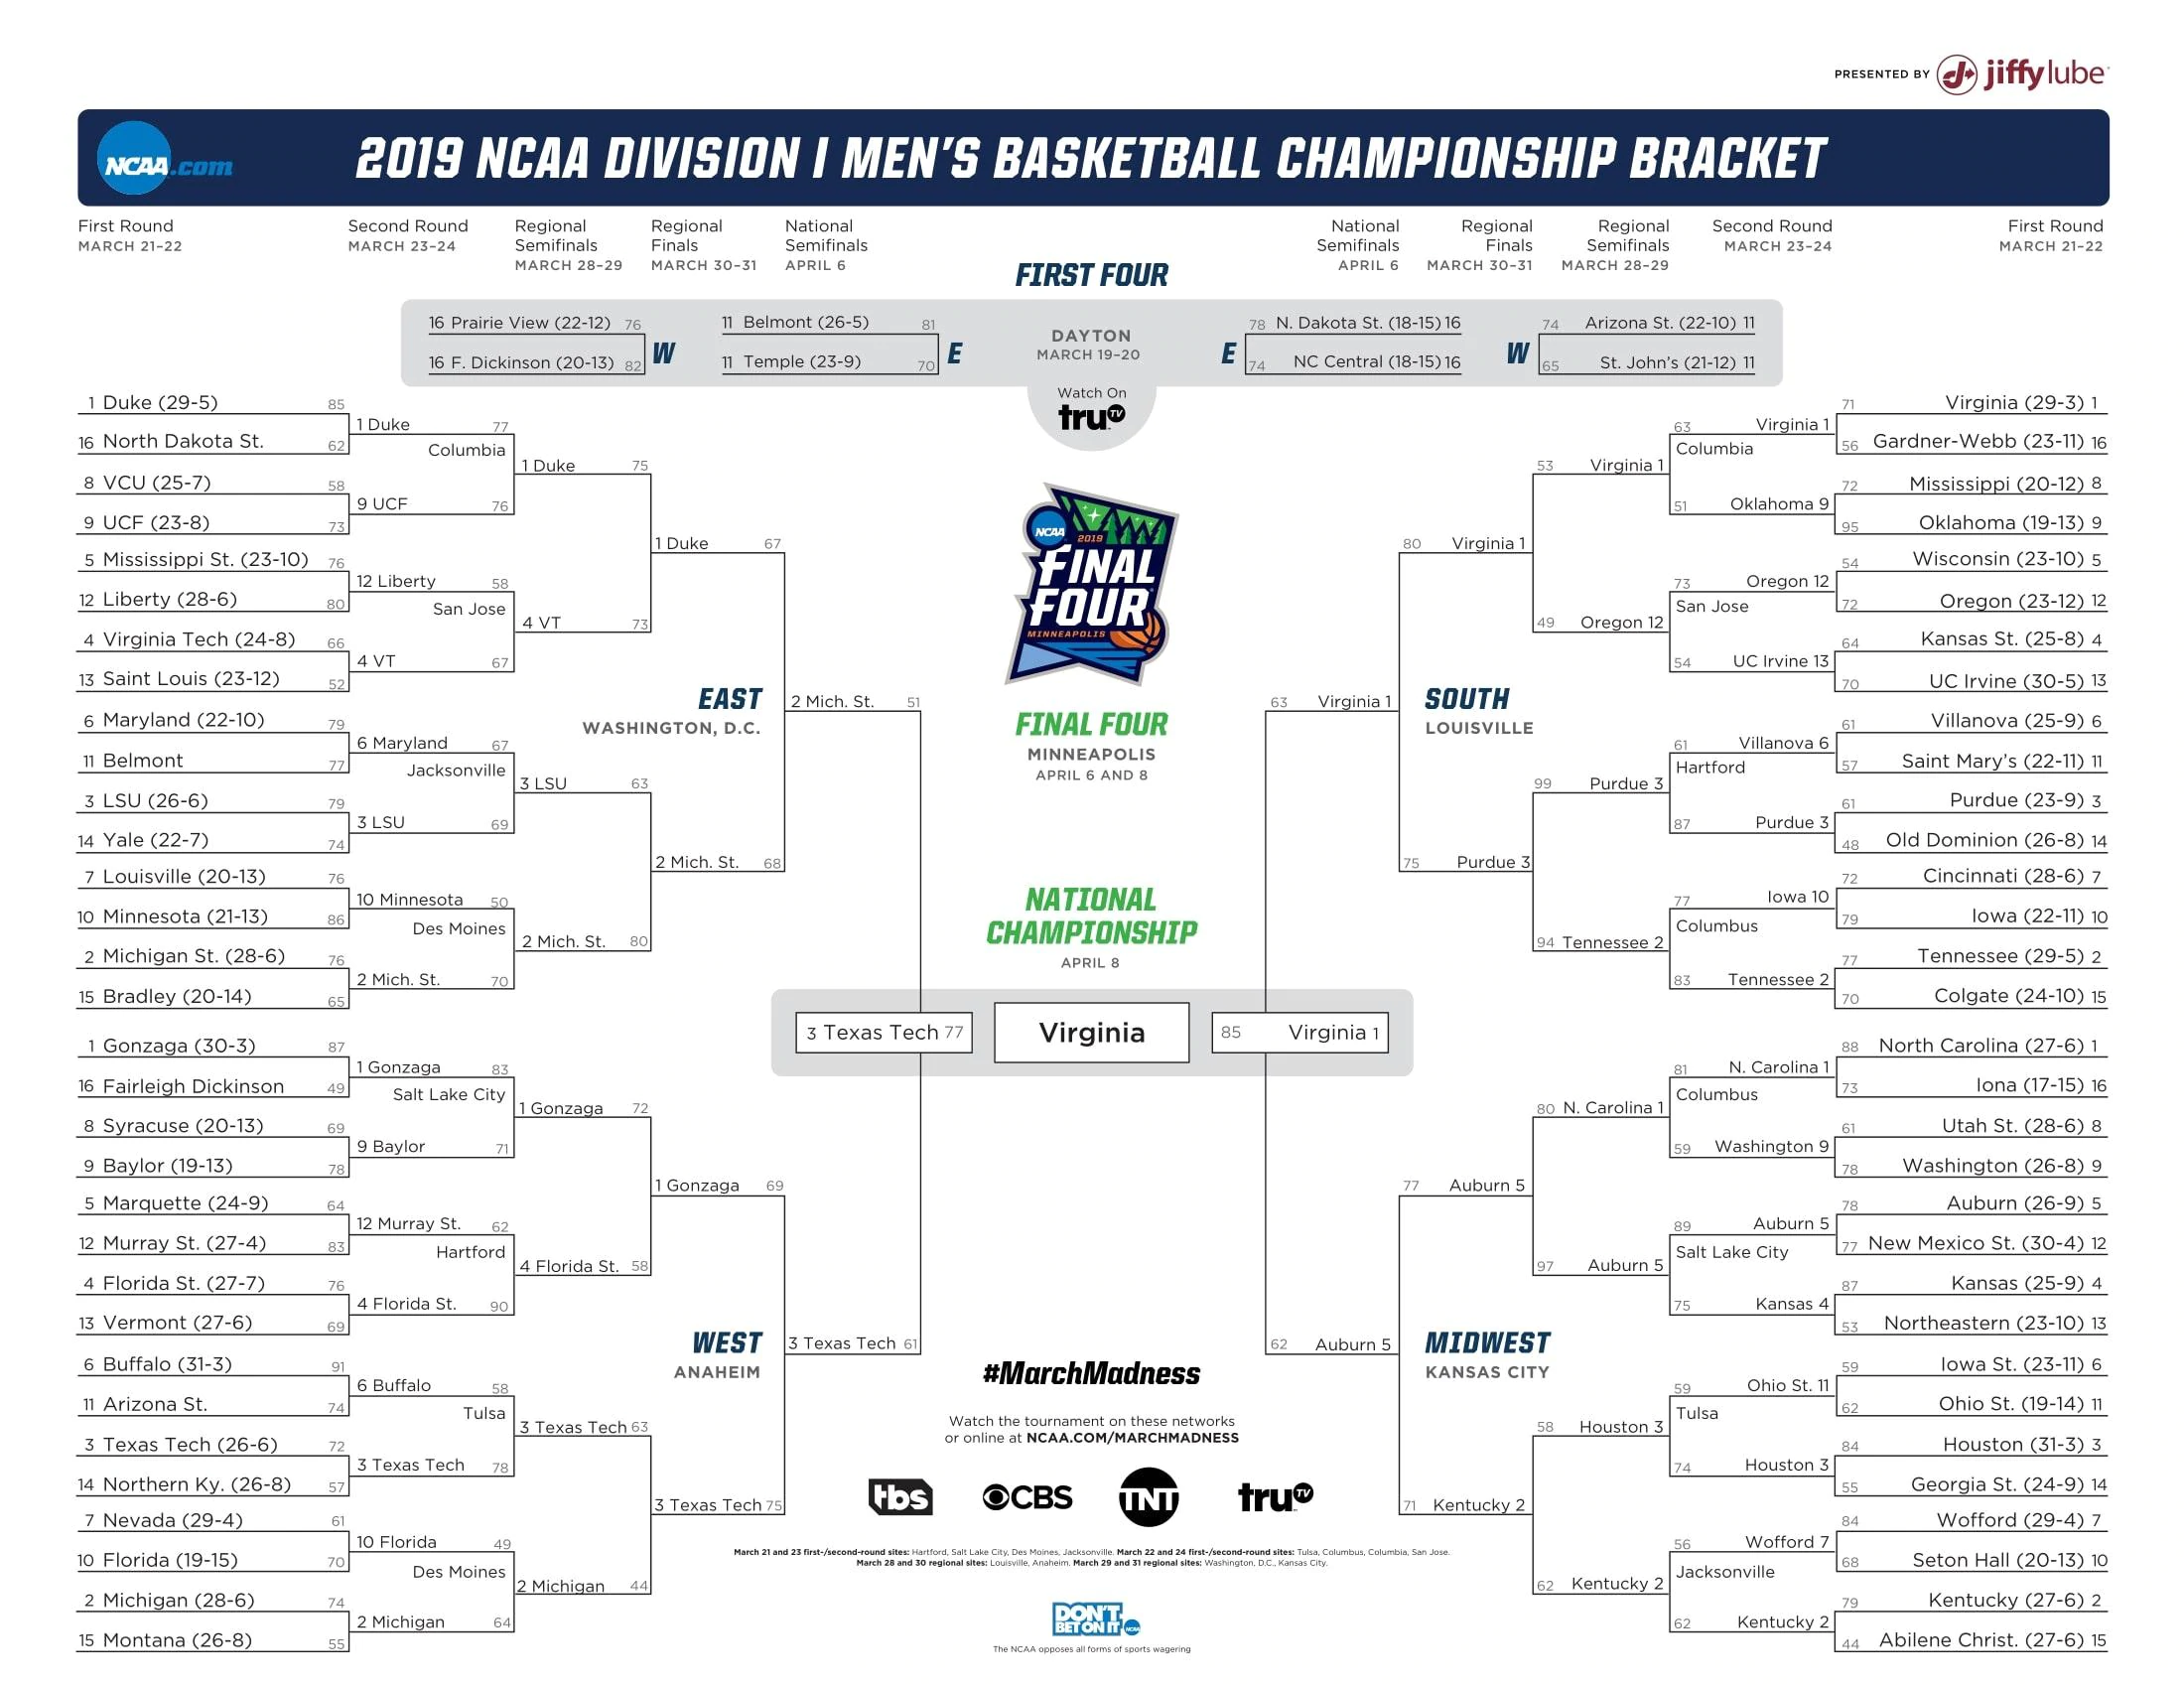

64 teams participate in the NCAA tournament each year. There are six rounds of knockout games in which the winner advances to the next round and the number of partcipants is halved each time. The champion will have effectively won six games at the end of the tournament. For machine learning purposes there are multiple approaches: set Y (target variable) to Number of Wins and test different independent variables influence on a scaled Y, or divide teams into different groups that denote success (Sweet Sixteen, Elite Eight, Final Four, Semi-Finalists, Champions) and try to classify them. These can be achieved by counting the number of wins in the tournament.

1st/2nd Round Exit: Wins <= 1 \
Sweet Sixteen: Wins = 2 \
Elite Eight: Wins = 3 \
Final Four: Wins = 4 \
Semi-Finalists: Wins = 5 \
Champion: Wins = 6

## 1. Data Loading

Two groups to choose from: detailed results or compact results. Compact stretches back to 1985, detailed only to 2003. Detailed provides us with more features and less to parse through. Each record from datasets 'MRegularSeasonDetailedResults' and 'MNCAATourneyDetailedResults' represents a game from the year's regular season or the tournament with columns for winning and losing team's final scores, attempted FG, attempted 3-point shots, rebounds, fouls, etc.

We want one comprehensive dataset that we can then split for training and testing for our final model that includes features that we can use to predict success.

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
season = pd.read_csv(os.path.join("2020DataFiles", "MRegularSeasonDetailedResults.csv"))
tourney = pd.read_csv(os.path.join("2020DataFiles", "MNCAATourneyDetailedResults.csv"))
w_teams = pd.read_csv(os.path.join("2020DataFiles", "MTeams.csv"))
l_teams = pd.read_csv(os.path.join("2020DataFiles", "MTeams.csv"))

In [3]:
w_teams = w_teams.rename(columns={
    "TeamID":"WTeamID",
    "TeamName":"WTeamName",
    "FirstD1Season":"WFirstD1Season",
    'LastD1Season':"WLastD1Season"
})

l_teams = l_teams.rename(columns={
    "TeamID":"LTeamID",
    "TeamName":"LTeamName",
    "FirstD1Season":"LFirstD1Season",
    'LastD1Season':"LLastD1Season"
});

In [4]:
season = season.merge(w_teams, on="WTeamID")
season = season.merge(l_teams, on="LTeamID")

In [5]:
season["WYearsExp"] = season["WLastD1Season"] - season["WFirstD1Season"]

season["LYearsExp"] = season["LLastD1Season"] - season["LFirstD1Season"]

In [ ]:
tourney = tourney.merge(w_teams, on="WTeamID")
tourney = tourney.merge(w_teams, on="WTeamID")

In [ ]:
tourney["WYearsExp"] = tourney["WLastD1Season"] - tourney["WFirstD1Season"]

tourney["LYearsExp"] = tourney["LLastD1Season"] - tourney["LFirstD1Season"]

In [ ]:
# frames = [season, tourney]
# games = pd.concat(frames)